In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'happy.csv'
happy_df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
happy_df.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [10]:
happy_df.columns

Index(['Country name', 'Regional indicator', 'Ladder score', 'upperwhisker',
       'lowerwhisker', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')

In [11]:
happy_df.columns = ['Country_name', 'Regional_indicator', 'Ladder_score', 'upperwhisker',
       'lowerwhisker', 'Log_GDP_per_capita', 'Social_support',
       'Healthy_life_expectancy', 'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption', 'Dystopia + residual']

In [13]:
happy_df

,Country_name,Regional_indicator,Ladder_score,upperwhisker,lowerwhisker,Log_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298
...,...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),Sub-Saharan Africa,3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102
139,Sierra Leone,Sub-Saharan Africa,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068
140,Lesotho,Sub-Saharan Africa,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875
141,Lebanon,Middle East and North Africa,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073


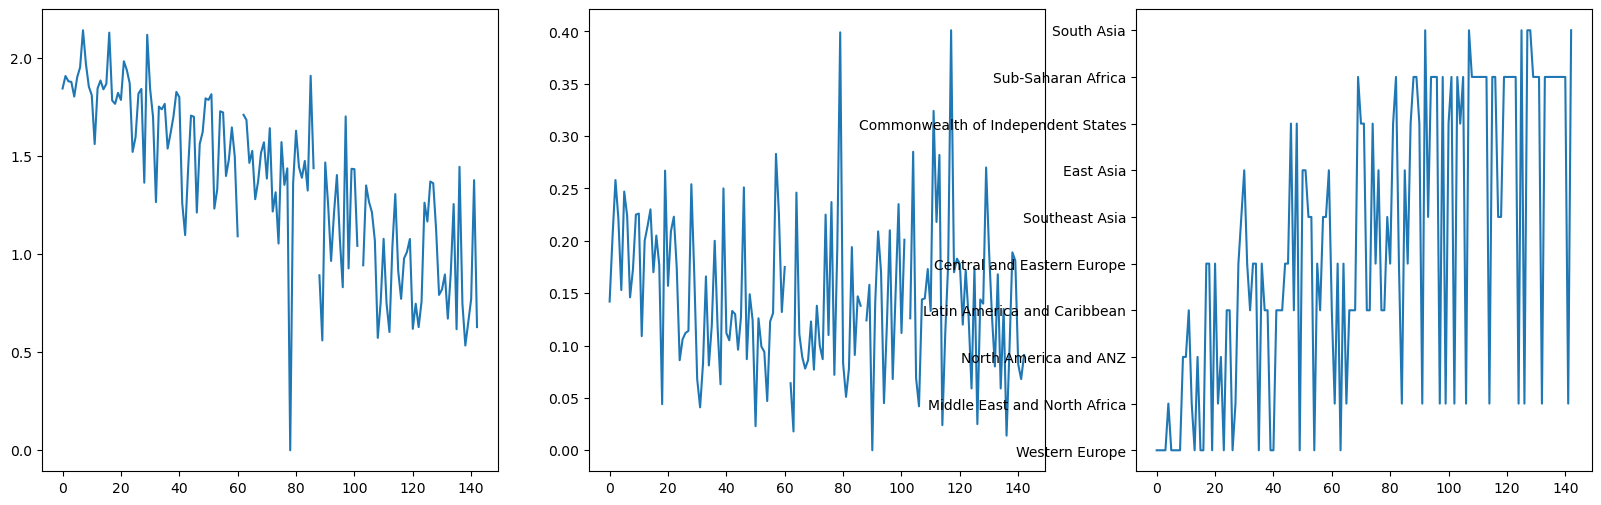

In [58]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.plot(happy_df.Log_GDP_per_capita)
plt.subplot(1, 3, 2)
plt.plot(happy_df.Generosity)
plt.subplot(1, 3, 3)
plt.plot(happy_df.Regional_indicator)
plt.savefig('Old version of relationship between log GDP per capita and generosity for different.png')

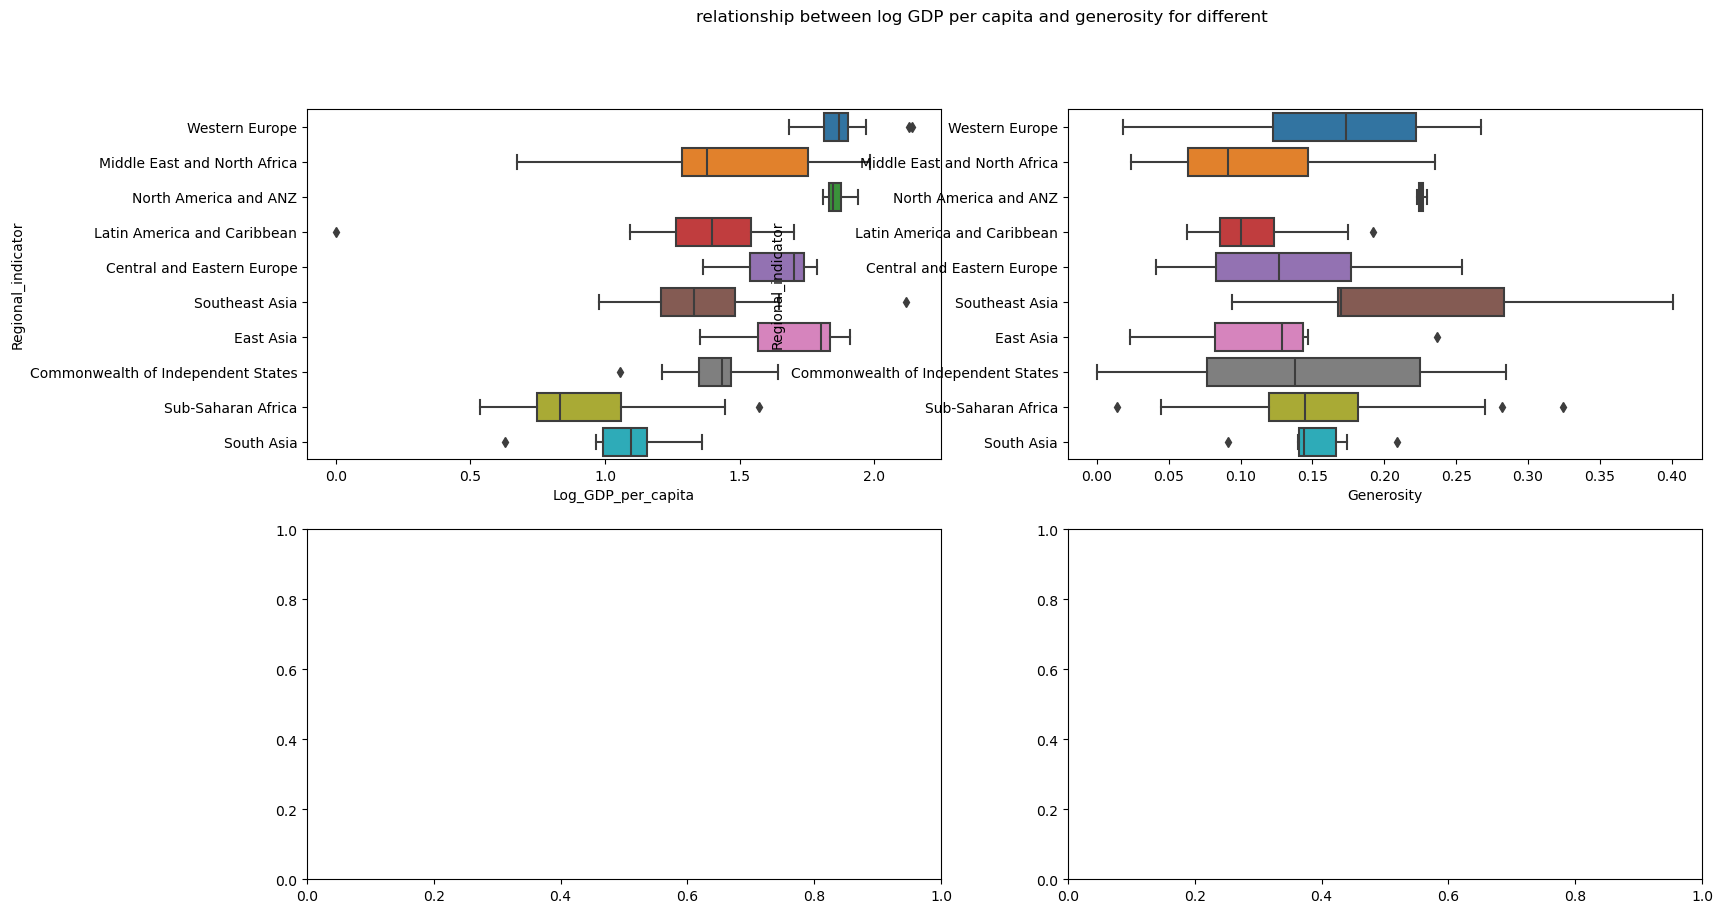

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('relationship between log GDP per capita and generosity for different')


sns.boxplot(ax=axes[0, 0], data=happy_df, x='Log_GDP_per_capita', y='Regional_indicator')
sns.boxplot(ax=axes[0, 1], data=happy_df, x='Generosity', y='Regional_indicator')

plt.savefig('relationship between log GDP per capita and generosity for different.png')

In [29]:
grp_happy = happy_df.groupby("Regional_indicator").agg({
    'Log_GDP_per_capita': 'mean',
    'Social_support': 'mean',
    'Healthy_life_expectancy': 'mean',
    'Freedom_to_make_life_choices': 'mean',
    'Generosity': 'mean',
    'Perceptions_of_corruption': 'mean',
    'Dystopia + residual': 'mean'
}).reset_index()

grp_happy

,Regional_indicator,Log_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Dystopia + residual
0,Central and Eastern Europe,1.637765,1.390706,0.610412,0.650471,0.135353,0.089353,1.656706
1,Commonwealth of Independent States,1.401000,1.254556,0.543556,0.697444,0.143111,0.122333,1.404667
2,East Asia,1.700333,1.302000,0.681833,0.587667,0.122167,0.200000,1.340833
3,Latin America and Caribbean,1.328211,1.267316,0.571158,0.703263,0.106789,0.109211,2.057474
4,Middle East and North Africa,1.460533,1.084200,0.553200,0.493667,0.108000,0.146067,1.325067
5,North America and ANZ,1.860750,1.459750,0.652000,0.704500,0.226000,0.335000,1.689250
6,South Asia,1.051833,0.611833,0.420333,0.553333,0.150333,0.099500,1.008500
7,Southeast Asia,1.374333,1.144556,0.520222,0.765000,0.223333,0.164556,1.360111
8,Sub-Saharan Africa,0.904171,0.788714,0.297686,0.515486,0.150400,0.111429,1.562086
9,Western Europe,1.873350,1.415150,0.709150,0.709700,0.171350,0.308650,1.654350


In [30]:
# Investigating the correlation of danceability with other factors
correlation_matrix = grp_happy[['Log_GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 'Freedom_to_make_life_choices', 'Generosity', 'Perceptions_of_corruption', 'Dystopia + residual']].corr()
correlation_matrix

,Log_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Dystopia + residual
Log_GDP_per_capita,1.000000,0.890955,0.957770,0.465670,0.241115,0.748988,0.292533
Social_support,0.890955,1.000000,0.872304,0.630049,0.159847,0.558838,0.595441
Healthy_life_expectancy,0.957770,0.872304,1.000000,0.486955,0.064436,0.626307,0.303538
Freedom_to_make_life_choices,0.465670,0.630049,0.486955,1.000000,0.555766,0.372645,0.441760
Generosity,0.241115,0.159847,0.064436,0.555766,1.000000,0.582477,-0.063674
Perceptions_of_corruption,0.748988,0.558838,0.626307,0.372645,0.582477,1.000000,0.187713
Dystopia + residual,0.292533,0.595441,0.303538,0.441760,-0.063674,0.187713,1.000000


In [41]:
grp_happy.to_csv('New_grp_happy_Dataframe.csv', index=False)

grp_happy

,Regional_indicator,Log_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Dystopia + residual
0,Central and Eastern Europe,1.637765,1.390706,0.610412,0.650471,0.135353,0.089353,1.656706
1,Commonwealth of Independent States,1.401000,1.254556,0.543556,0.697444,0.143111,0.122333,1.404667
2,East Asia,1.700333,1.302000,0.681833,0.587667,0.122167,0.200000,1.340833
3,Latin America and Caribbean,1.328211,1.267316,0.571158,0.703263,0.106789,0.109211,2.057474
4,Middle East and North Africa,1.460533,1.084200,0.553200,0.493667,0.108000,0.146067,1.325067
5,North America and ANZ,1.860750,1.459750,0.652000,0.704500,0.226000,0.335000,1.689250
6,South Asia,1.051833,0.611833,0.420333,0.553333,0.150333,0.099500,1.008500
7,Southeast Asia,1.374333,1.144556,0.520222,0.765000,0.223333,0.164556,1.360111
8,Sub-Saharan Africa,0.904171,0.788714,0.297686,0.515486,0.150400,0.111429,1.562086
9,Western Europe,1.873350,1.415150,0.709150,0.709700,0.171350,0.308650,1.654350


# DataFrame Analysis Findings
**Here are the key findings from the DataFrame:**

Western Europe vs. Log_GDP_per_capita:<br>
from the dataframe we can see the Western Europe have the higher Log_GDP_per_capita which is 1.873350.

Sub-Saharan Africa vs. Log_GDP_per_capita:<br>
Sub-Saharan Africa have the lower Log_GDP_per_capita which is just 0.904171.

Regional_indicator vs. Social_support vs. Healthy_life_expectancy:<br>
From the dataframe we can know that Western Europe have the higher Log_GDP_per_capita, Social_support, and Healthy_life_expectancy.
- This shows that a higher GDP has a great effect on Social_support and the Healthy_life_expectancy also.

